# Exploratory Data Analysis

* Name: Naveen R
* Reg.No: 2348439
* Class: 3 MDS B
* Date: 15/02/2024

# Importing necessary libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # To perform operations on the dataset

# To plot interactive graphs 
import plotly.express as px 
import plotly.graph_objects as go 
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

The dataset is taken from kaggle :
[Sales Dataset](https://www.kaggle.com/datasets/naveen1729/100-sales)

In [3]:
df=pd.read_csv(r"D:\Github\Kaggle\datasets\100_Sales.csv").drop(columns=['Unnamed: 9','Unnamed: 10'])
df

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Ship_Date,Unit_Cost,Total_Revenue,Total_Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,27/06/2010,159.42,2533654.00,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,15/09/2012,117.11,576782.80,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05/08/2014,524.96,1158502.59,224598.75
3,Sub_Saharan Africa,Sao Tome and Principe,Fruits,Online,C,07/05/2014,6.92,75591.66,19525.82
4,Sub_Saharan Africa,Rwanda,Office Supplies,Offline,L,02/06/2013,524.96,3296425.02,639077.50
...,...,...,...,...,...,...,...,...,...
95,Sub_Saharan Africa,Mali,Clothes,Online,M,09/03/2011,35.84,97040.64,65214.72
96,Asia,Malaysia,Fruits,Offline,L,28/12/2011,6.92,58471.11,15103.47
97,Sub_Saharan Africa,Sierra Leone,Vegetables,Offline,C,29/06/2016,90.93,228779.10,93748.05
98,North America,Mexico,Personal Care,Offline,M,08/08/2015,56.67,471336.91,144521.02


# Data Exploration

In [4]:
print(f'The shape of the data is: {df.shape}\n')
print(f'The size of the data is: {df.size}\n')
print(f'The columns in the dataset are: \n {df.columns}')

The shape of the data is: (100, 9)

The size of the data is: 900

The columns in the dataset are: 
 Index(['Region', 'Country', 'Item_Type', 'Sales_Channel', 'Order_Priority',
       'Ship_Date', 'Unit_Cost', 'Total_Revenue', 'Total_Profit'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item_Type       100 non-null    object 
 3   Sales_Channel   100 non-null    object 
 4   Order_Priority  100 non-null    object 
 5   Ship_Date       100 non-null    object 
 6   Unit_Cost       100 non-null    float64
 7   Total_Revenue   100 non-null    float64
 8   Total_Profit    100 non-null    float64
dtypes: float64(3), object(6)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Unit_Cost,Total_Revenue,Total_Profit
count,100.000000,1.000000e+02,1.000000e+02
mean,191.048000,1.373488e+06,4.416820e+05
std,188.208181,1.460029e+06,4.385379e+05
min,6.920000,4.870260e+03,1.258020e+03
25%,35.840000,2.687212e+05,1.214436e+05
50%,107.275000,7.523144e+05,2.907680e+05
75%,263.330000,2.212045e+06,6.358288e+05
max,524.960000,5.997055e+06,1.719922e+06


In [7]:
df.isnull().sum()

Region            0
Country           0
Item_Type         0
Sales_Channel     0
Order_Priority    0
Ship_Date         0
Unit_Cost         0
Total_Revenue     0
Total_Profit      0
dtype: int64

In [8]:
if df.duplicated().any()>0:
    print(f"The number of duplicates are {df.duplicated().sum()}")
else:
    print(f'There are no duplicates r in the dataset')

There are no duplicates r in the dataset


In [9]:
# Creating new columns named Expenses and Profit_Margin
df["Expense"]=df['Total_Revenue']-df["Total_Profit"]
df["Profit_Margin"]=(df["Total_Profit"]/df["Total_Revenue"])*100
df

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Ship_Date,Unit_Cost,Total_Revenue,Total_Profit,Expense,Profit_Margin
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,27/06/2010,159.42,2533654.00,951410.50,1582243.50,37.550924
1,Central America and the Caribbean,Grenada,Cereal,Online,C,15/09/2012,117.11,576782.80,248406.36,328376.44,43.067574
2,Europe,Russia,Office Supplies,Offline,L,05/08/2014,524.96,1158502.59,224598.75,933903.84,19.386987
3,Sub_Saharan Africa,Sao Tome and Principe,Fruits,Online,C,07/05/2014,6.92,75591.66,19525.82,56065.84,25.830654
4,Sub_Saharan Africa,Rwanda,Office Supplies,Offline,L,02/06/2013,524.96,3296425.02,639077.50,2657347.52,19.386987
...,...,...,...,...,...,...,...,...,...,...,...
95,Sub_Saharan Africa,Mali,Clothes,Online,M,09/03/2011,35.84,97040.64,65214.72,31825.92,67.203514
96,Asia,Malaysia,Fruits,Offline,L,28/12/2011,6.92,58471.11,15103.47,43367.64,25.830654
97,Sub_Saharan Africa,Sierra Leone,Vegetables,Offline,C,29/06/2016,90.93,228779.10,93748.05,135031.05,40.977541
98,North America,Mexico,Personal Care,Offline,M,08/08/2015,56.67,471336.91,144521.02,326815.89,30.661936


# Data Analysis

# 1. Geographical Analysis

In [10]:
region=df['Region'].value_counts().reset_index()
region

,Region,count
0,Sub_Saharan Africa,36
1,Europe,22
2,Australia and Oceania,11
3,Asia,11
4,Middle East and North Africa,10
5,Central America and the Caribbean,7
6,North America,3


In [11]:
fig = px.pie(region, names=df['Region'], title='Distribution of Regions')

fig.update_traces(
    pull=[0.1, 0, 0.2, 0],  # Use pull to emphasize specific slices (adjust values as needed)
    textinfo='percent+label',  # Display percentage and label in pie slices
    hoverinfo='label+value+percent',  # Display additional information on hover
    textposition='inside',  # Place text inside the pie slices
    marker=dict(line=dict(color='#ffffff', width=2)),  # Add white border around slices
)

fig.update_layout(
    showlegend=True,  # Display legend
    legend=dict(title='Regions'),  # Customize legend title
)

fig.show()

## Conclusion:
From the above we can see that the most products are sold in Sub_Saharan Africa and Europe region.

<hr style="height: 4px; color: #333; background-color: #333; margin: 20px 0;">


In [12]:
region_orders = df.groupby('Region').agg({'Total_Revenue': 'sum', 'Total_Profit': 'sum'}).sort_values(by=['Total_Revenue'],ascending=[False])
region_orders

,Total_Revenue,Total_Profit
Region,,
Sub_Saharan Africa,39672031.43,12183211.40
Europe,33368932.11,11082938.63
Asia,21347091.02,6113845.87
Australia and Oceania,14094265.13,4722160.03
Middle East and North Africa,14052706.58,5761191.86
Central America and the Caribbean,9170385.49,2846907.85
North America,5643356.55,1457942.76


In [13]:
import plotly.graph_objects as go

region_orders = df.groupby('Region').agg({
    'Total_Revenue': 'sum',
    'Total_Profit': 'sum'
}).reset_index().sort_values(by='Total_Revenue', ascending=False)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=region_orders['Region'],
    y=region_orders['Total_Revenue'],
    name='Total Revenue'
))

fig.add_trace(go.Bar(
    x=region_orders['Region'],
    y=region_orders['Total_Profit'],
    name='Total Profit'
))

# Update layout
fig.update_layout(
    barmode='group',
    xaxis_title='Region',
    yaxis_title='Amount',
    title='Total Revenue and Profit by Region'
)

# Show the figure
fig.show()


## Conclusion

From the above analysis we can see that North America and Central America and the Caribbean are region where are sales are less.

<hr style="height: 4px; color: #333; background-color: #333; margin: 20px 0;">


# 2. Product Category Analysis:

In [14]:
prod_cat=df.groupby('Item_Type')['Total_Profit'].sum().sort_values(ascending=False)
prod_cat.to_frame()

,Total_Profit
Item_Type,
Cosmetics,14556048.66
Household,7412605.71
Office Supplies,5929583.75
Clothes,5233334.40
Baby Food,3886643.70
Cereal,2292443.43
Vegetables,1265819.63
Personal Care,1220622.48
Beverages,888047.28


In [15]:
fig = px.box(df, x='Item_Type', y='Total_Profit', title='Profit Distribution by Item Type')

fig.update_traces(marker=dict(color='rgba(255, 144, 14, 0.6)', outliercolor='rgba(219, 64, 82, 0.6)', line=dict(color='rgba(255, 255, 255, 0.6)', width=2)))

fig.update_layout(
    yaxis_title='Total Profit',
    xaxis_title='Item Type',
    boxmode='group',  # 'group' displays boxes side by side; 'overlay' overlays them
    showlegend=False,  # Hide legend
)

fig.show()

## Conclusion

From the above analysis we can say that Household and Cosmetics provide high profit to the company.

<hr style="height: 4px; color: #333; background-color: #333; margin: 20px 0;">


# 3. Sales Channel and Priority:

In [16]:
online_sales=df[df['Sales_Channel']=='Online']
offline_sales=df[df['Sales_Channel']=='Offline']

average_unit_cost_online = online_sales['Unit_Cost'].mean()
average_unit_cost_offline = offline_sales['Unit_Cost'].mean()

print(f"Average Unit Cost for Online Sales: {average_unit_cost_online}")
print(f"Average Unit Cost for Offline Sales: {average_unit_cost_offline}")

if average_unit_cost_online > average_unit_cost_offline:
    print("Online sales have a higher average unit cost.")
elif average_unit_cost_online < average_unit_cost_offline:
    print("Offline sales have a higher average unit cost.")
else:
    print("Average unit cost is the same for both online and offline sales.")



Average Unit Cost for Online Sales: 165.273
Average Unit Cost for Offline Sales: 216.82299999999998
Offline sales have a higher average unit cost.


# Conclusion

From the above analysis we say that Offline sales have a higher average unit cost.

<hr style="height: 4px; color: #333; background-color: #333; margin: 20px 0;">


# 4. Temporal Analysis:

In [17]:
# Convert 'Ship_Date' to datetime format
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])

# Create a new column for the year
df['Year']=df['Ship_Date'].dt.year

groupby_year=df.groupby('Year').agg({'Total_Revenue':'sum','Total_Profit':'sum'}).reset_index()
groupby_year

C:\Users\Naveen\AppData\Local\Temp\ipykernel_5488\718522317.py:2: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



,Year,Total_Revenue,Total_Profit
0,2010,16604238.53,5987980.15
1,2011,11459719.49,2946149.26
2,2012,34149877.49,9649456.37
3,2013,20156772.41,6662167.54
4,2014,16803890.68,5932714.18
5,2015,12427982.86,3996539.44
6,2016,12372867.22,4903838.01
7,2017,13373419.63,4089353.45


In [18]:
# Create a line chart
fig = px.line(groupby_year, x='Year', y='Total_Revenue', title='Total Revenue Trend Over Years')

# Customizations
fig.update_traces(
    line=dict(color='blue', width=2),  # Line color and width
    marker=dict(color='red', size=8),  # Marker color and size
    name='Total Revenue',  # Trace name
)

# Update layout
fig.update_layout(
    xaxis_title='Year',  # X-axis title
    yaxis_title='Total Revenue',  # Y-axis title
    legend=dict(title='Legend Title'),  # Legend title
    showlegend=True,  # Show legend
)

# Show the figure
fig.show()

# Conclusion

Sales of company over the year is decreasing.

<hr style="height: 4px; color: #333; background-color: #333; margin: 20px 0;">


# 5. Country-wise Analysis:

Question: Identify the country with the lowest total profit. Provide the name of the country and the corresponding total profit.

In [19]:
df.groupby('Country')['Total_Profit'].sum().sort_values(ascending=True).head(5)

Country
Kuwait          1258.02
New Zealand     5270.67
Kyrgyzstan      7828.12
Syria           9119.44
Slovakia       10795.23
Name: Total_Profit, dtype: float64

## Conclusion
The top five countries with lowest profit are Kuwait, New Zealand, Kyrgyzstan,Syria, Slovakia.

<hr style="height: 4px; color: #333; background-color: #333; margin: 20px 0;">


# Assumption:

Mean Total_Revenue from online Sales_Channel is equal to Mean Total_Revenue from offline Sales_Channel.

In [20]:
import scipy.stats as stats

online_revenue = df[df['Sales_Channel'] == 'Online']['Total_Revenue']
offline_revenue = df[df['Sales_Channel'] == 'Offline']['Total_Revenue']

t_stat, p_value = stats.ttest_ind(online_revenue, offline_revenue)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in Total_Revenue between Online and Offline Sales Channels.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in Total_Revenue between Online and Offline Sales Channels.")


Fail to reject the null hypothesis: There is no significant difference in Total_Revenue between Online and Offline Sales Channels.


In [21]:
fig=px.sunburst(df,
               path=['Region','Country','Sales_Channel'],
               values='Total_Profit',
               color='Region')
fig.show()

# Parametric tests

# Assumption:

Mean Total_Revenue from online Sales_Channel is equal to Mean Total_Revenue from offline Sales_Channel.

In [22]:
import scipy.stats as stats

# Assuming df is your DataFrame
online_revenue = df[df['Sales_Channel'] == 'Online']['Total_Revenue']
offline_revenue = df[df['Sales_Channel'] == 'Offline']['Total_Revenue']

# Perform two-sample z-test
t_stat, p_value = stats.ttest_ind(online_revenue, offline_revenue)

# Check the p-value to determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in Total_Revenue between Online and Offline Sales Channels.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in Total_Revenue between Online and Offline Sales Channels.")


Fail to reject the null hypothesis: There is no significant difference in Total_Revenue between Online and Offline Sales Channels.


# Statistical Plots

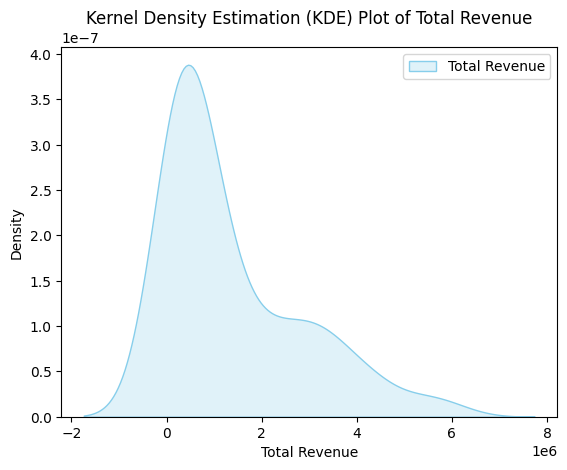

In [23]:
sns.kdeplot(df['Total_Revenue'], fill=True, color='skyblue', label='Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE) Plot of Total Revenue')
plt.legend()
plt.show()

In [24]:
print(f'The skewness value of total revenue of the company {df["Total_Revenue"].skew()}')
print(f'The kurtosis value of the total revenue of the company {df["Total_Revenue"].kurtosis()}')

The skewness value of total revenue of the company 1.2776978228408213
The kurtosis value of the total revenue of the company 0.8045392122060888


# Conclusion

The skewness value of total revenue measures the asymmetry of the distribution. A positive skewness (1.2777) indicates a distribution that is skewed to the right, meaning that the tail on the right side is longer or fatter than the left side. In the context of total revenue, this suggests that there might be some high revenue outliers contributing to the right tail of the distribution.

The kurtosis value measures the "tailedness" of the distribution. A positive kurtosis (0.8045) indicates that the distribution has fatter tails and a sharper peak than a normal distribution. In practical terms, this means that the distribution has more extreme values in the tails. Again, for total revenue, this might suggest the presence of some extreme values.